# Prediction and verifying task completion times

## Introduction
In this study, we predict the completion times for four tasks using the KLM method and verify them by experiments. 
For the prediction we use on the one hand the times defined by Card, Moran and Newell (1980) and on the other hand also the times determined by ourselves in an earlier experiment. 

## Test design
For this study, a previously programmed calculator was used to log all relevant inputs with timestamps to obtain the task completion time. Participants are presented with the calculator in their normal work environment on their home computers. One after the other, four predefined tasks are presented concerning the use of the calculator. To get a range of times each experiment is repeated five times. 
After each task, the associated csv file is saved separately for later analysis.

## Tasks and Predicitons
The following four tasks are given to the participants:

    T1)	adding the numbers from 1 to 20 using only the mouse
    T2)	adding the numbers from 1 to 20 using only the keyboard
    T3)	calculating the result of (3² + 4²) * 15.2 using only the mouse
    T4)	calculating the result of (3² + 4²) * 15.2 using only the keyboard
 
### Predictions
Card et al.'s times for experienced users are used to predict task completion times, as well as the times we determined in previous studies. Following times are presented in milliseconds.

Card et al.: K = 200, P = 1100, H = 400, M = 1200, B = 100

Our own times: K = 248.7, P = 452.2, H = 994.3, M = 2657.6, B = 100

For the following estimations we always assume that a task starts with pressing the first button and the task ends with the final calculation of the term by clicking the equal button.
Since we assume that our subjects are experienced, the tasks are predefined and the time measurement only starts after the first button was pressed, we do not add any additional mental processes.

    T1) The input corresponds to the expression „1+2+3+4+5+6+7+8+9+10+11+12+13+14+15+16+17+18+19+20=“. That means, there are 51 buttons to click and 51 - 2 pointing operators (for the number 11 it is not necessary to change the cursor position between the first and the second digit and it is not necessary to point to the first number of the task)
    
        Operators: 51B51B49P
        Estimation according to the literature for experienced users: 64100 ms
        Estimation according to own test results: 32357.8 ms
    
    T2) The input corresponds to the expression „1+2+3+4+5+6+7+8+9+10+11+12+13+14+15+16+17+18+19+20=“. That means, there are 51 keystrokes.
    
        Operators: 51K
        Estimation according to the literature for experienced users: 10200 ms
        Estimation according to own test results: 12683.7 ms
    
    T3) Since the calculator used does not support squaring or parentheses, the specification is equivalent to entering the following expression: “3*3+4*4=*15.2=”. This means that for the expression 14 buttons must be clicked and the mouse pointer must be moved 14-1 times (it is not necessary to point to the first number of the task).
    
        Operators: 14B14B13P
        Estimation according to the literature for experienced users: 17100 ms
        Estimation according to own test results: 8678.6 ms

    T4) Since the calculator used does not support squaring or parentheses, the specification is equivalent to entering the following expression: "3*3+4*4=*15.2=”. Since the multiplication sign requires not only one keystroke but two (at the same time capital key), 17 keystrokes are necessary.
    
        Operators: 17K
        Estimation according to the literature for experienced users: 3400 ms
        Estimation according to own test results: 4227.9 ms


## Variables
The independent variable of this study is the task performed. The dependent variable is the task completion time.

To minimize confounding factors, the experiment is conducted in the participants' familiar environment with their own hardware. In addition, care is taken to conduct the tests at a suitable, quiet moment. Notifications on the notebook as well as on the smartphone are muted. 

## Participants
The experiment was performed on two subjects. Due to the pandemic situation, it is not that easy to recruit study participants. Since it is necessary to run a Python program on a Linux machine for the trial, we decided to test ourselves. 
As a result, one man and one woman were tested each. The average age of the test subjects is 28 years. Both test subjects are master students of media informatics at the University of Regensburg and used to work with mouse and keyboard on the computer.

## Logging

During the experiment, the start of the experiment was logged when the users pressed the first button on the calculator. The end of a task was logged when the user presses the "Clear All" button and therefore starts a new segment. However, this "end" log entry uses the timestamp of the last previous button press, i.e. the last button used for the actual task, since the "Clear All" button is not part of our task description. The participants were instructed to clear the input after each task segment, and told that this does not contribute to the measured values.

## Presentations of the results

In the following, the experiment data are first prepared for evaluation. The individual tasks are initially shown in a comparative figure. These are supplemented in another figure by the predicted values to highlight the differences between the predicted and actual performance. Finally, additional statistical values are calculated for the individual tasks.

### Preparations

In [1]:
# imports
import pandas as pd # data mangling
import matplotlib
from matplotlib import pyplot as plt
import sys
import datetime
import numpy as np
import seaborn as sns
import statistics as stats

In [2]:
# read all csv files to dataframes

task1_lj = pd.read_csv('task1_lj.csv')
task2_lj = pd.read_csv('task2_lj.csv')
task3_lj = pd.read_csv('task3_lj.csv')
task4_lj = pd.read_csv('task4_lj.csv')
task1_ev = pd.read_csv('task1_ev.csv')
task2_ev = pd.read_csv('task2_ev.csv')
task3_ev = pd.read_csv('task3_ev.csv')
task4_ev = pd.read_csv('task4_ev.csv')

In [3]:
# concat csv files of same tasks

df_task1 = pd.concat([task1_lj, task1_ev], ignore_index=True, sort=False)
df_task2 = pd.concat([task2_lj, task2_ev], ignore_index=True, sort=False)
df_task3 = pd.concat([task3_lj, task3_ev], ignore_index=True, sort=False)
df_task4 = pd.concat([task4_lj, task4_ev], ignore_index=True, sort=False)

In [4]:
# dictionaries of estimated times
TASK_ESTIMATES = {"Task 1" : 32.3578, "Task 2": 12.6837, "Task 3": 8.6786, "Task 4": 4.2279}
TASK_LITERATURE_ESTIMATES = {"Task 1": 64.100, "Task 2": 10.200, "Task 3": 17.100, "Task 4": 3.400}

### Side by side visualization

In [5]:
# Array of all start and end times
start_times_task1 = pd.to_datetime(df_task1[(df_task1['key'] == 'EXPERIMENT_START')]['timestamp']).tolist()
end_times_task1 = pd.to_datetime(df_task1[(df_task1['key'] == 'EXPERIMENT_END')]['timestamp']).tolist()


start_times_task2 = pd.to_datetime(df_task2[(df_task2['key'] == 'EXPERIMENT_START')]['timestamp']).tolist()
end_times_task2 = pd.to_datetime(df_task2[(df_task2['key'] == 'EXPERIMENT_END')]['timestamp']).tolist()

start_times_task3 = pd.to_datetime(df_task3[(df_task3['key'] == 'EXPERIMENT_START')]['timestamp']).tolist()
end_times_task3 = pd.to_datetime(df_task3[(df_task3['key'] == 'EXPERIMENT_END')]['timestamp']).tolist()

start_times_task4 = pd.to_datetime(df_task4[(df_task4['key'] == 'EXPERIMENT_START')]['timestamp']).tolist()
end_times_task4 = pd.to_datetime(df_task4[(df_task4['key'] == 'EXPERIMENT_END')]['timestamp']).tolist()

task1_time_delta = []
task2_time_delta = []
task3_time_delta = []
task4_time_delta = []

# in order for this loop to work properly, all tasks need to have been completed an equal amount of times
# if this throws an index out of bounds exception, check your logs or make separate loops for all tasks
for x in range (len(start_times_task2)):
    task1_time_delta.append(end_times_task1[x] - start_times_task1[x])
    task2_time_delta.append(end_times_task2[x] - start_times_task2[x])
    task3_time_delta.append(end_times_task3[x] - start_times_task3[x])
    task4_time_delta.append(end_times_task4[x] - start_times_task4[x])
    


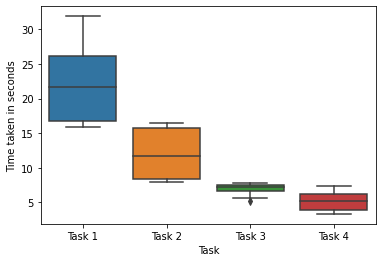

In [6]:
# prepare a DataFrame that holds the task number, and the time taken
df_all_tasks_delta = pd.DataFrame(columns=["task", "time_taken_in_s", "is_estimate"])

# append all values from the time delta dataframes and assign them their respective task
for time in task1_time_delta:
    df_all_tasks_delta = df_all_tasks_delta.append({
        'task': "Task 1",
        'time_taken_in_s': time.total_seconds(),
        'is_estimate': False
    }, ignore_index=True)
    
for time in task2_time_delta:
    df_all_tasks_delta = df_all_tasks_delta.append({
        'task': "Task 2",
        'time_taken_in_s': time.total_seconds(),
        'is_estimate': False
    }, ignore_index=True)
    
for time in task3_time_delta:
    df_all_tasks_delta = df_all_tasks_delta.append({
        'task': "Task 3",
        'time_taken_in_s': time.total_seconds(),
        'is_estimate': False
    }, ignore_index=True)
    
for time in task4_time_delta:
    df_all_tasks_delta = df_all_tasks_delta.append({
        'task': "Task 4",
        'time_taken_in_s': time.total_seconds(),
        'is_estimate': False
    }, ignore_index=True)

plot = sns.boxplot(
    data = df_all_tasks_delta,
    x = 'task',
    y = 'time_taken_in_s'
)
plot.set(xlabel = "Task", ylabel = "Time taken in seconds")

plt.show()

### Visualizations highlighting the difference between estimates and actual performance

In [7]:
df_all_tasks_estimates = pd.DataFrame(["task", "time_taken_in_s", "is_literature_estimate"])

# iterate over the dictionaries and append the values to the DataFrame
# is_literature_estimate uses Strings instead of booleans so the plot label does not misbehave afterwards
for key in TASK_ESTIMATES:
    df_all_tasks_estimates = df_all_tasks_estimates.append({
        'task': key,
        'time_taken_in_s': TASK_ESTIMATES[key],
        'is_literature_estimate': "False"
    }, ignore_index=True)

for key in TASK_LITERATURE_ESTIMATES:
    df_all_tasks_estimates = df_all_tasks_estimates.append({
        'task': key,
        'time_taken_in_s': TASK_LITERATURE_ESTIMATES[key],
        'is_literature_estimate': "True"
    }, ignore_index=True)

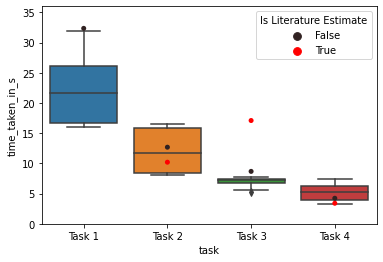

In [8]:
ax = sns.stripplot(
    data = df_all_tasks_estimates,
    y = 'time_taken_in_s',
    x = "task",
    hue = "is_literature_estimate",
    jitter=0.0,
    color="red"
)

ax.legend(title="Is Literature Estimate")

plot = sns.boxplot(
    data = df_all_tasks_delta,
    x = 'task',
    y = 'time_taken_in_s',
    ax=ax
)

plot.set(ylim=(0, 36))

plt.show()

Note for the figure above: Since the predicted literature time for Task 1 was 64.1 seconds, the datapoint is not included in the graph, in order to not shrink the boxplots too much.

### Numeric stats

In [9]:
task1_seconds = []
task2_seconds = []
task3_seconds = []
task4_seconds = []

for time in task1_time_delta:
    task1_seconds.append(time.total_seconds())
    
for time in task2_time_delta:
    task2_seconds.append(time.total_seconds())
    
for time in task3_time_delta:
    task3_seconds.append(time.total_seconds())
    
for time in task4_time_delta:
    task4_seconds.append(time.total_seconds())
    
mean = stats.mean(task1_seconds)
median = stats.median(task1_seconds)
minimum = min(task1_seconds)
maximum = max(task1_seconds)

print("All times below are in seconds (s)")
print("Task 1 mean: " + str(stats.mean(task1_seconds)))
print("Task 1 median: " + str(stats.median(task1_seconds)))
print("Task 1 min: " + str(min(task1_seconds)))
print("Task 1 max: " + str(max(task1_seconds)) + "\n\n")

print("Task 2 mean: " + str(stats.mean(task2_seconds)))
print("Task 2 median: " + str(stats.median(task2_seconds)))
print("Task 2 min: " + str(min(task2_seconds)))
print("Task 2 max: " + str(max(task2_seconds)) + "\n\n")

print("Task 3 mean: " + str(stats.mean(task3_seconds)))
print("Task 3 median: " + str(stats.median(task3_seconds)))
print("Task 3 min: " + str(min(task3_seconds)))
print("Task 3 max: " + str(max(task3_seconds)) + "\n\n")

print("Task 4 mean: " + str(stats.mean(task4_seconds)))
print("Task 4 median: " + str(stats.median(task4_seconds)))
print("Task 4 min: " + str(min(task4_seconds)))
print("Task 4 max: " + str(max(task4_seconds)) + "\n\n")

All times below are in seconds (s)
Task 1 mean: 22.1284606
Task 1 median: 21.6071545
Task 1 min: 15.947379
Task 1 max: 31.89744


Task 2 mean: 12.0933439
Task 2 median: 11.7439585
Task 2 min: 7.998183
Task 2 max: 16.498976


Task 3 mean: 6.937998
Task 3 median: 7.274559999999999
Task 3 min: 5.207564
Task 3 max: 7.735133


Task 4 mean: 5.1627457
Task 4 median: 5.2057435000000005
Task 4 min: 3.328764
Task 4 max: 7.347561




## Results

In the following table, both the two predicted values and the mean of the experimental execution are shown for the individual tasks.

| Task | Literature estimate | Our estimate | Actual performance |
| --- | --- | --- | --- |
| Task 1 | 64100 ms | 32357.8 ms | 22128.5 ms |
| Task 2 | 10200 ms | 12683.7 ms | 12093.3 ms |
| Task 3 | 17100 ms | 8678.6 ms | 6938.0 ms |
| Task 4 | 3400 ms | 4227.9 ms | 5162.7 ms |

First of all, it can be noted that the tasks with mouse input have higher task completion times than the task with keyboard input, which applies to both the measured and the predicted values. This is due to the fact that clicking a button with the mouse is usually composed of two operators, whereas with the keyboard only one operator is necessary in our experiment setup. 

If we take a closer look at the two tasks with mouse input, i.e. Task 1 and 3, we see that the experimentally achieved value is visibly smaller than the two predicted values.
It can be assumed that the pointing times in our experimental setup were smaller than estimated, since the participants were experienced and no large distances had to be covered during pointing.

For Task 2, summing a given series of numbers with the keyboard, the experimental value ranks between the two predicted ones. However, the difference from the own predicted value is less than 600 ms, suggesting that the own estimate for the keystroke operator was very accurate.
Also for Task 4, a given calculation was entered with the keyboard. Here, the lowest values of all tasks are generally achieved. However, in contrast to Task 2, the experimentally achieved value is 934.8 ms above the own predicted values.

## Discussion



As already mentioned, the results from Task 2 indicate that the own estimate of the keystroke operator is very accurate for this experiment, whereas the estimate of the pointing operator was probably too high. 

However, in order to substantiate these statements and to achieve more precise insights, further experiments are necessary. For example, the experiment can be conducted with an additional arithmetic task, which ranks in difficulty and recall between the arithmetic tasks used here.
